In [1]:
!pip install keras-tcn
!pip install keras-tcn --no-dependencies

     |████████████████████████████████| 706kB 8.9MB/s 


In [3]:
import math
import matplotlib.pyplot as plt
import numpy as np

import keras 
import pandas as pd


from keras.models import Sequential
from keras.layers import Dense 

from keras.layers import Dropout

from keras.layers import LSTM

from keras.layers import *

from tensorflow.keras import Input, Model

from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import mean_squared_error

from sklearn.metrics import mean_absolute_error

from sklearn.model_selection import train_test_split

from keras.callbacks import EarlyStopping


from keras.layers import Dense, InputLayer, Dropout, Flatten, BatchNormalization, Conv1D



from keras.layers import Dense, Embedding, LSTM, Bidirectional

from tcn import TCN, tcn_full_summary

DATA

In [4]:
df=pd.read_csv("TESLA.csv")
print("Number of rows and columns:", df.shape)
df.head(5)
training_set = df.iloc[:881, 4:5].values

test_set = df.iloc[881:, 4:5].values
# Feature Scaling
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)
# Creating a data structure with 60 time-steps and 1 output
X_train = []
y_train = []
for i in range(60, 881):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_train.shape

Number of rows and columns: (1259, 7)


(821, 60, 1)

TCN MODEL

In [5]:
dataset_train = df.iloc[:881, 4:5]
dataset_test = df.iloc[881:, 4:5]
dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
print(inputs.shape)
X_test = []
for i in range(60, 438):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(X_test.shape)

y =  dataset_test.values.reshape(378,) 
# (459, 60, 1)

(438, 1)
(378, 60, 1)


In [ ]:
X_train.shape

(821, 60, 1)

In [5]:
np.random.seed(1)
model = Sequential()
model.add(TCN(nb_filters=64, kernel_size=4, nb_stacks=1, dilations=[1, 2, 4, 8, 16 ], padding='causal', use_skip_connections=False, dropout_rate=0.1, return_sequences=False, activation='relu', input_shape = (X_train.shape[1], 1)))
model.add(Dense(units = 1))
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
26/26 [==============================] - 34s 16ms/step - loss: 17.6060
Epoch 2/100
26/26 [==============================] - 0s 6ms/step - loss: 0.4754
Epoch 3/100
26/26 [==============================] - 0s 7ms/step - loss: 0.2567
Epoch 4/100
26/26 [==============================] - 0s 8ms/step - loss: 0.1609
Epoch 5/100
26/26 [==============================] - 0s 8ms/step - loss: 0.1267
Epoch 6/100
26/26 [==============================] - 0s 7ms/step - loss: 0.1050
Epoch 7/100
26/26 [==============================] - 0s 7ms/step - loss: 0.0854
Epoch 8/100
26/26 [==============================] - 0s 8ms/step - loss: 0.0683
Epoch 9/100
26/26 [==============================] - 0s 7ms/step - loss: 0.0717
Epoch 10/100
26/26 [==============================] - 0s 7ms/step - loss: 0.0621
Epoch 11/100
26/26 [==============================] - 0s 7ms/step - loss: 0.0567
Epoch 12/100
26/26 [==============================] - 0s 8ms/step - loss: 0.0457
Epoch 13/100
26/26 [==============

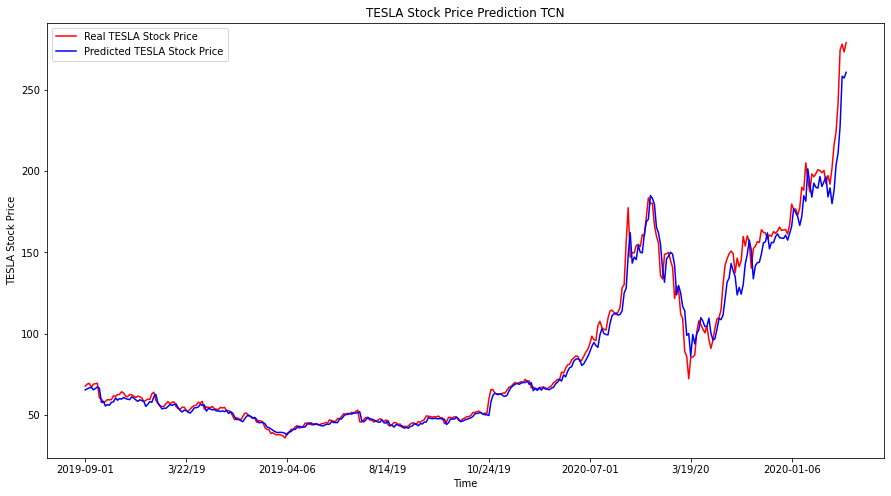

<Figure size 432x288 with 0 Axes>

In [6]:
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)
y =  dataset_test.values.reshape(378,) 
x = df.loc[881: , "Date"] 
# Visualising the results
plt.figure(figsize=(15,8))
plt.plot(x, y, c= "red", label = "Real TESLA Stock Price")
plt.plot(df.loc[881:, "Date"],predicted_stock_price, color = "blue", label = "Predicted TESLA Stock Price")
plt.xticks(np.arange(0,378,50))
plt.title('TESLA Stock Price Prediction TCN')
plt.xlabel('Time')
plt.ylabel('TESLA Stock Price')
plt.legend()
plt.show() 
plt.savefig("TESLA TCN")

In [7]:
abse = mean_absolute_error(predicted_stock_price,y)
abse

4.313551086357965

In [8]:
rmse = math.sqrt(mean_squared_error(predicted_stock_price,y))
rmse

7.497345295774187

TCN + GRU Model

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 60, 1)]      0                                            
__________________________________________________________________________________________________
gru_1 (GRU)                     (None, 200)          121800      input_2[0][0]                    
__________________________________________________________________________________________________
tcn_1 (TCN)                     (None, 64)           185408      input_2[0][0]                    
__________________________________________________________________________________________________
dense_3 (Dense)                 (None, 1)            201         gru_1[0][0]                      
____________________________________________________________________________________________

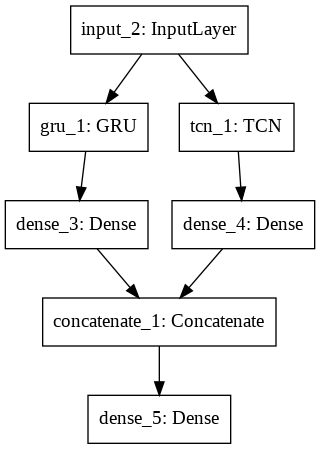

In [11]:
np.random.seed(1)


from keras.layers import Input
from keras.utils import plot_model
from keras.layers.merge import concatenate
from keras.models import Model

visible = Input(shape=(60,1))

#GRU
gru1 = GRU(units = 200, input_shape = (X_train.shape[1], 1))(visible)
out1 = Dense(units = 1)(gru1)

#TCN
tcn1 = TCN(nb_filters=64, kernel_size=5, nb_stacks=1, dilations=[1, 2, 4, 8, 16 ], padding='causal', use_skip_connections=False, dropout_rate=0, return_sequences=False, activation='relu', input_shape = (X_train.shape[1], 1))(visible)
out2 = Dense(units = 1)(tcn1)

# merge interpretation
merge = concatenate([out1, out2])

# output
output = Dense(1)(merge)
model = Model(inputs=visible, outputs=output)

# summarize layers
print(model.summary())

# plot graph
plot_model(model, to_file='shared_feature_extractor.png')


In [12]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(X_train, y_train, epochs = 30, batch_size = 32)

Epoch 1/30
26/26 [==============================] - 3s 14ms/step - loss: 3.1141
Epoch 2/30
26/26 [==============================] - 0s 10ms/step - loss: 0.0216
Epoch 3/30
26/26 [==============================] - 0s 11ms/step - loss: 0.0039
Epoch 4/30
26/26 [==============================] - 0s 11ms/step - loss: 0.0024
Epoch 5/30
26/26 [==============================] - 0s 11ms/step - loss: 0.0023
Epoch 6/30
26/26 [==============================] - 0s 11ms/step - loss: 0.0022
Epoch 7/30
26/26 [==============================] - 0s 11ms/step - loss: 0.0021
Epoch 8/30
26/26 [==============================] - 0s 11ms/step - loss: 0.0023
Epoch 9/30
26/26 [==============================] - 0s 11ms/step - loss: 0.0021
Epoch 10/30
26/26 [==============================] - 0s 11ms/step - loss: 0.0017
Epoch 11/30
26/26 [==============================] - 0s 10ms/step - loss: 0.0015
Epoch 12/30
26/26 [==============================] - 0s 11ms/step - loss: 0.0021
Epoch 13/30
26/26 [==================

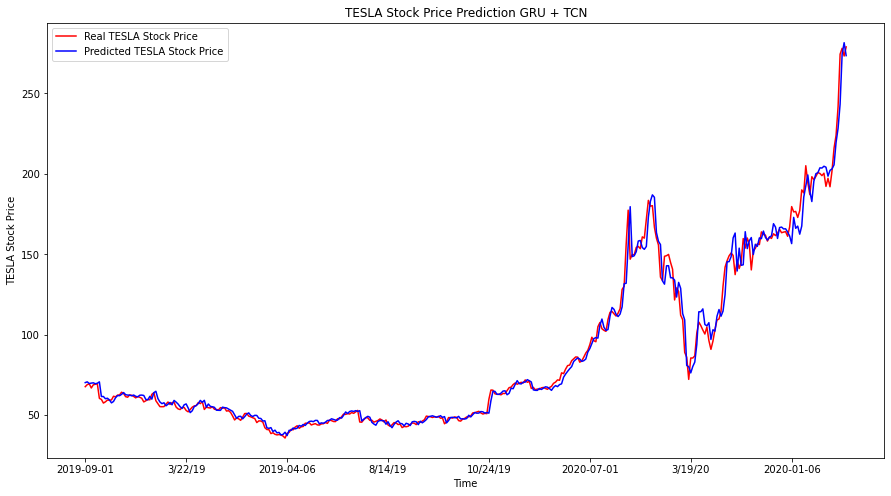

<Figure size 432x288 with 0 Axes>

In [13]:
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)
y =  dataset_test.values.reshape(378,) 
x = df.loc[881: , "Date"] 
# Visualising the results
plt.figure(figsize=(15,8))
plt.plot(x, y, c= "red", label = "Real TESLA Stock Price")
plt.plot(df.loc[881:, "Date"],predicted_stock_price, color = "blue", label = "Predicted TESLA Stock Price")
plt.xticks(np.arange(0,378,50))
plt.title('TESLA Stock Price Prediction GRU + TCN')
plt.xlabel('Time')
plt.ylabel('TESLA Stock Price')
plt.legend()
plt.show() 
plt.savefig("TESLA GRU + TCN")

In [14]:
abse = mean_absolute_error(predicted_stock_price,y)
rmse = math.sqrt(mean_squared_error(predicted_stock_price,y))
print(abse,rmse)

3.400477146409454 5.919133731269421


CNN GRU MODEL

In [ ]:

dataset_train = df.iloc[:881, 4:5]
dataset_test = df.iloc[881:, 4:5]
dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
print(inputs.shape)
X_test = []
for i in range(60, 438):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1, 1))
print(X_test.shape)

y =  dataset_test.values.reshape(378,) 
# (459, 60, 1)

(438, 1)
(378, 60, 1, 1)


In [ ]:
np.random.seed(1)
model = Sequential()
model.add(TimeDistributed(Conv1D(filters=64, kernel_size=1, activation='relu'), input_shape = (X_train.shape[1],1, 1)))
model.add(TimeDistributed(MaxPooling1D(pool_size=1)))
model.add(TimeDistributed(Flatten()))
model.add(GRU(units = 700)) 
model.add(Dropout(0.1))
model.add(Dense(units = 1))
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(X_train, y_train, epochs = 30, batch_size = 32)

Epoch 1/30


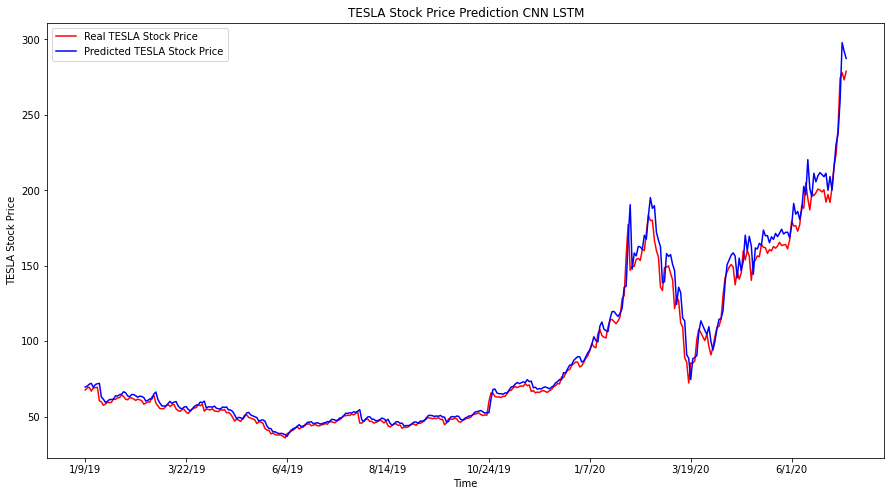

<Figure size 432x288 with 0 Axes>

In [ ]:
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)
y =  dataset_test.values.reshape(378,) 
x = df.loc[881: , "Date"] 
# Visualising the results
plt.figure(figsize=(15,8))
plt.plot(x, y, c= "red", label = "Real TESLA Stock Price")
plt.plot(df.loc[881:, "Date"],predicted_stock_price, color = "blue", label = "Predicted TESLA Stock Price")
plt.xticks(np.arange(0,378,50))
plt.title('TESLA Stock Price Prediction CNN LSTM')
plt.xlabel('Time')
plt.ylabel('TESLA Stock Price')
plt.legend()
plt.show() 
plt.savefig("TESLA CNN LSTM")

In [ ]:
abse = mean_absolute_error(predicted_stock_price,y)
abse

4.192853681452029

In [ ]:
rmse = math.sqrt(mean_squared_error(predicted_stock_price,y))
rmse

6.693045171976584

CNN

In [ ]:
df=pd.read_csv("TESLA.csv")
print("Number of rows and columns:", df.shape)
df.head(5)
training_set = df.iloc[:881, 4:5].values

test_set = df.iloc[881:, 4:5].values
# Feature Scaling
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)
# Creating a data structure with 60 time-steps and 1 output
X_train = []
y_train = []
for i in range(60, 881):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1], 1))
X_train.shape

Number of rows and columns: (1259, 7)


(821, 1, 60, 1)

In [ ]:
np.random.seed(1)
model = Sequential()
model.add(TimeDistributed(Conv1D(filters=128, kernel_size=11, activation='relu'), input_shape = (1, X_train.shape[2],1)))
model.add(TimeDistributed(MaxPooling1D(pool_size=2)))
model.add(TimeDistributed(Flatten()))
model.add(Dense(units = 1))
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(X_train, y_train, epochs = 30, batch_size = 32)

Epoch 1/30
26/26 [==============================] - 1s 3ms/step - loss: 0.1098
Epoch 2/30
26/26 [==============================] - 0s 3ms/step - loss: 0.0148
Epoch 3/30
26/26 [==============================] - 0s 2ms/step - loss: 0.0117
Epoch 4/30
26/26 [==============================] - 0s 2ms/step - loss: 0.0093
Epoch 5/30
26/26 [==============================] - 0s 2ms/step - loss: 0.0069
Epoch 6/30
26/26 [==============================] - 0s 3ms/step - loss: 0.0055
Epoch 7/30
26/26 [==============================] - 0s 2ms/step - loss: 0.0042
Epoch 8/30
26/26 [==============================] - 0s 2ms/step - loss: 0.0044
Epoch 9/30
26/26 [==============================] - 0s 2ms/step - loss: 0.0044
Epoch 10/30
26/26 [==============================] - 0s 2ms/step - loss: 0.0040
Epoch 11/30
26/26 [==============================] - 0s 2ms/step - loss: 0.0039
Epoch 12/30
26/26 [==============================] - 0s 2ms/step - loss: 0.0038
Epoch 13/30
26/26 [==============================

In [ ]:

dataset_train = df.iloc[:881, 4:5]
dataset_test = df.iloc[881:, 4:5]
dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
print(inputs.shape)
X_test = []
for i in range(60, 438):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1],1))
print(X_test.shape)
# (459, 60, 1)

(438, 1)
(378, 1, 60, 1)


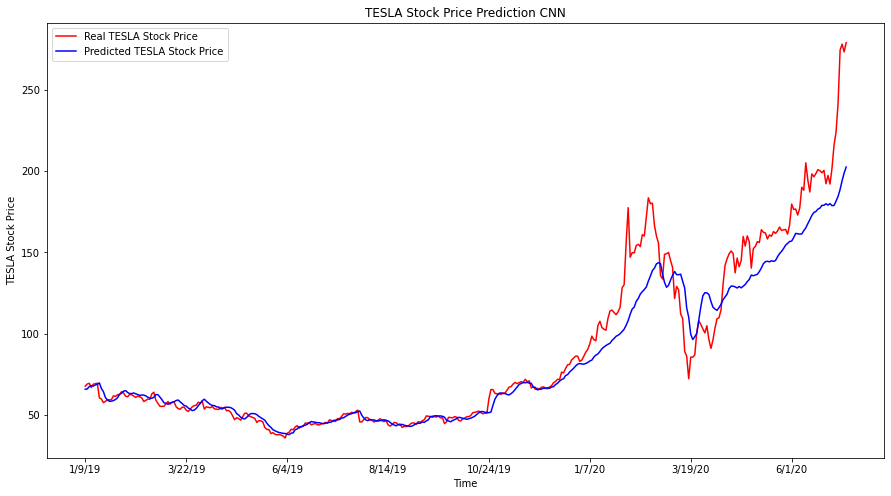

<Figure size 432x288 with 0 Axes>

In [ ]:

predicted_stock_price = model.predict(X_test).reshape(-1,1)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)
y =  dataset_test.values.reshape(378,) 
x = df.loc[881: , "Date"] 
# Visualising the results
plt.figure(figsize=(15,8))
plt.plot(x, y, c= "red", label = "Real TESLA Stock Price")
plt.plot(df.loc[881:, "Date"],predicted_stock_price, color = "blue", label = "Predicted TESLA Stock Price")
plt.xticks(np.arange(0,378,50))
plt.title('TESLA Stock Price Prediction CNN')
plt.xlabel('Time')
plt.ylabel('TESLA Stock Price')
plt.legend()
plt.show() 
plt.savefig("TESLA CNN")

In [ ]:
abse = mean_absolute_error(predicted_stock_price,y)
abse

8.944166145000155

In [ ]:
rmse=math.sqrt(mean_squared_error(predicted_stock_price,y))
rmse

16.01393914302336

LSTM GRU MODEL

In [ ]:

# Creating a data structure with 60 time-steps and 1 output
X_train = []
y_train = []
for i in range(60, 881):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0],  X_train.shape[1], 1))
X_train.shape

(821, 60, 1)

In [ ]:
np.random.seed(1)
model = Sequential()
model.add(LSTM(units = 700, return_sequences=True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.1))
model.add(GRU(units = 700,  input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.1))
model.add(Dense(units = 1))
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(X_train, y_train, epochs = 30, batch_size = 32)

Epoch 1/30
26/26 [==============================] - 3s 32ms/step - loss: 0.0707
Epoch 2/30
26/26 [==============================] - 1s 27ms/step - loss: 0.0030
Epoch 3/30
26/26 [==============================] - 1s 27ms/step - loss: 0.0019
Epoch 4/30
26/26 [==============================] - 1s 28ms/step - loss: 0.0021
Epoch 5/30
26/26 [==============================] - 1s 28ms/step - loss: 0.0019
Epoch 6/30
26/26 [==============================] - 1s 28ms/step - loss: 0.0021
Epoch 7/30
26/26 [==============================] - 1s 28ms/step - loss: 0.0017
Epoch 8/30
26/26 [==============================] - 1s 28ms/step - loss: 0.0022
Epoch 9/30
26/26 [==============================] - 1s 28ms/step - loss: 0.0016
Epoch 10/30
26/26 [==============================] - 1s 28ms/step - loss: 0.0020
Epoch 11/30
26/26 [==============================] - 1s 27ms/step - loss: 0.0021
Epoch 12/30
26/26 [==============================] - 1s 28ms/step - loss: 0.0017
Epoch 13/30
26/26 [==================

TEST DATA

In [ ]:

dataset_train = df.iloc[:881, 4:5]
dataset_test = df.iloc[881:, 4:5]
dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
print(inputs.shape)
X_test = []
for i in range(60, 438):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(X_test.shape)


(438, 1)
(378, 60, 1)


PREDICTION

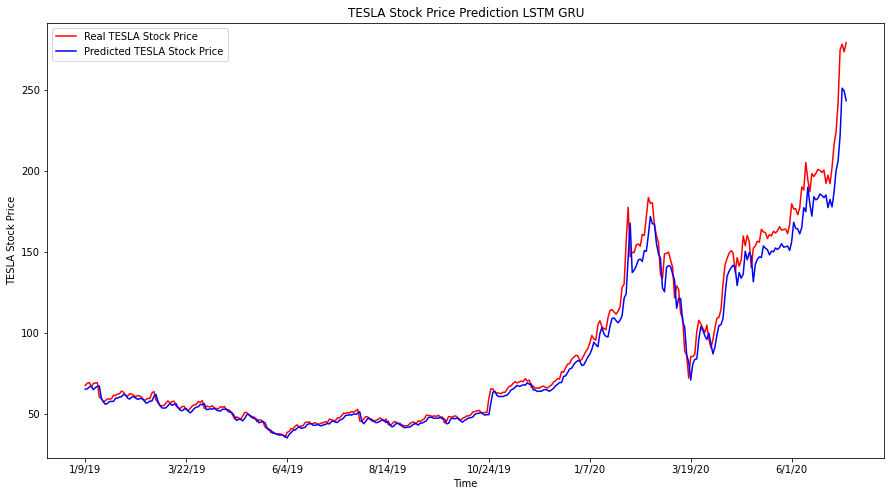

<Figure size 432x288 with 0 Axes>

In [ ]:
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)
y =  dataset_test.values.reshape(378,) 
x = df.loc[881: , "Date"] 
# Visualising the results
plt.figure(figsize=(15,8))
plt.plot(x, y, c= "red", label = "Real TESLA Stock Price")
plt.plot(df.loc[881:, "Date"],predicted_stock_price, color = "blue", label = "Predicted TESLA Stock Price")
plt.xticks(np.arange(0,378,50))
plt.title('TESLA Stock Price Prediction LSTM GRU')
plt.xlabel('Time')
plt.ylabel('TESLA Stock Price')
plt.legend()
plt.show() 
plt.savefig("TESLA LSTM GRU")

In [ ]:
abse = mean_absolute_error(predicted_stock_price,y)
abse

5.398190396230546

In [ ]:
rmse = math.sqrt(mean_squared_error(predicted_stock_price,y))
rmse

8.834950244759693

LSTM Model

In [ ]:
np.random.seed(1)
model = Sequential()
model.add(LSTM(units = 700, input_shape = (X_train.shape[1], 1))) 
model.add(Dropout(0.1))
model.add(Dense(units = 1))
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(X_train, y_train, epochs = 30, batch_size = 32)

Epoch 1/30
26/26 [==============================] - 2s 16ms/step - loss: 0.2021
Epoch 2/30
26/26 [==============================] - 0s 13ms/step - loss: 0.0109
Epoch 3/30
26/26 [==============================] - 0s 13ms/step - loss: 0.0057
Epoch 4/30
26/26 [==============================] - 0s 13ms/step - loss: 0.0044
Epoch 5/30
26/26 [==============================] - 0s 13ms/step - loss: 0.0043
Epoch 6/30
26/26 [==============================] - 0s 13ms/step - loss: 0.0041
Epoch 7/30
26/26 [==============================] - 0s 13ms/step - loss: 0.0039
Epoch 8/30
26/26 [==============================] - 0s 13ms/step - loss: 0.0043
Epoch 9/30
26/26 [==============================] - 0s 13ms/step - loss: 0.0040
Epoch 10/30
26/26 [==============================] - 0s 13ms/step - loss: 0.0039
Epoch 11/30
26/26 [==============================] - 0s 13ms/step - loss: 0.0040
Epoch 12/30
26/26 [==============================] - 0s 13ms/step - loss: 0.0039
Epoch 13/30
26/26 [==================

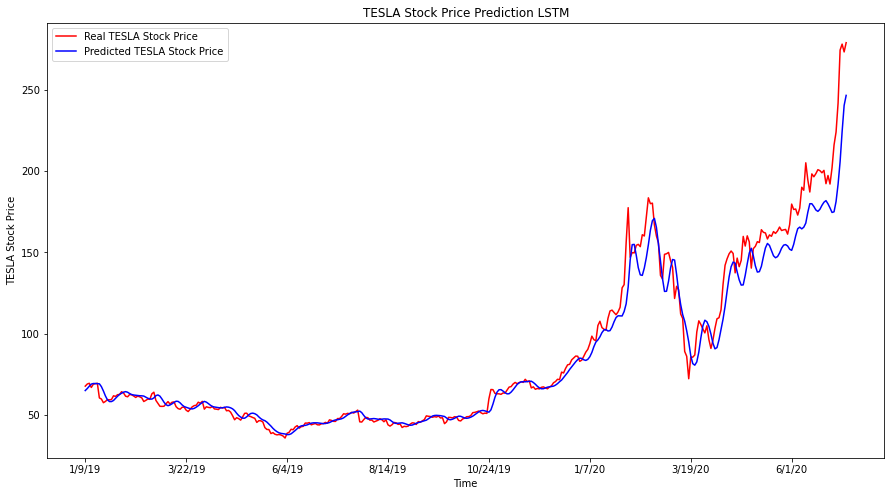

<Figure size 432x288 with 0 Axes>

In [ ]:
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)
y =  dataset_test.values.reshape(378,) 
x = df.loc[881: , "Date"] 
# Visualising the results
plt.figure(figsize=(15,8))
plt.plot(x, y, c= "red", label = "Real TESLA Stock Price")
plt.plot(df.loc[881:, "Date"],predicted_stock_price, color = "blue", label = "Predicted TESLA Stock Price")
plt.xticks(np.arange(0,378,50))
plt.title('TESLA Stock Price Prediction LSTM')
plt.xlabel('Time')
plt.ylabel('TESLA Stock Price')
plt.legend()
plt.show() 
plt.savefig("TESLA LSTM")

In [ ]:
abse = mean_absolute_error(predicted_stock_price,y)
abse

6.2887891526873565

In [ ]:
rmse = math.sqrt(mean_squared_error(predicted_stock_price,y))
rmse

11.227320939398547

RNN MODEL


In [ ]:
model = Sequential()

model.add(SimpleRNN(units = 700, input_shape = (X_train.shape[1], 1))) 
model.add(Dropout(0.2))

model.add(Dense(units = 1))

model.compile(optimizer = 'adam', loss = 'mean_squared_error')

model.fit(X_train, y_train, epochs = 30, batch_size = 32) 

Epoch 1/30
26/26 [==============================] - 2s 38ms/step - loss: 0.8891
Epoch 2/30
26/26 [==============================] - 1s 40ms/step - loss: 0.3243
Epoch 3/30
26/26 [==============================] - 1s 40ms/step - loss: 0.2313
Epoch 4/30
26/26 [==============================] - 1s 39ms/step - loss: 0.2059
Epoch 5/30
26/26 [==============================] - 1s 41ms/step - loss: 0.2417
Epoch 6/30
26/26 [==============================] - 1s 42ms/step - loss: 0.1977
Epoch 7/30
26/26 [==============================] - 1s 40ms/step - loss: 0.1898
Epoch 8/30
26/26 [==============================] - 1s 40ms/step - loss: 0.1325
Epoch 9/30
26/26 [==============================] - 1s 40ms/step - loss: 0.5440
Epoch 10/30
26/26 [==============================] - 1s 40ms/step - loss: 0.2848
Epoch 11/30
26/26 [==============================] - 1s 40ms/step - loss: 0.3260
Epoch 12/30
26/26 [==============================] - 1s 40ms/step - loss: 0.2824
Epoch 13/30
26/26 [==================

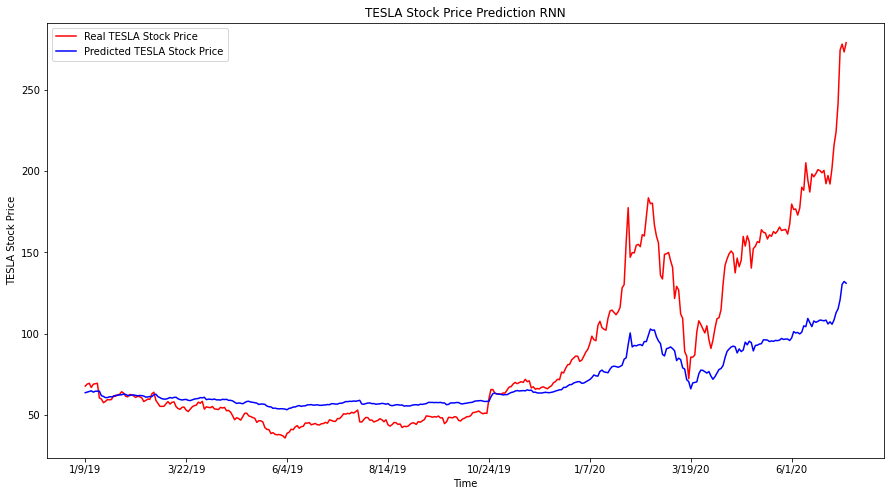

<Figure size 432x288 with 0 Axes>

In [ ]:
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)
y =  dataset_test.values.reshape(378,) 
x = df.loc[881: , "Date"] 
# Visualising the results
plt.figure(figsize=(15,8))
plt.plot(x, y, c= "red", label = "Real TESLA Stock Price")
plt.plot(df.loc[881:, "Date"],predicted_stock_price, color = "blue", label = "Predicted TESLA Stock Price")
plt.xticks(np.arange(0,378,50))
plt.title('TESLA Stock Price Prediction RNN')
plt.xlabel('Time')
plt.ylabel('TESLA Stock Price')
plt.legend()
plt.show() 
plt.savefig("TESLA RNN")

In [ ]:
abse = mean_absolute_error(predicted_stock_price,y)
abse

25.026134859075963

In [ ]:
rmse = math.sqrt(mean_squared_error(predicted_stock_price,y))
rmse

38.88316077383857

GRU

In [ ]:
np.random.seed(1)

model = Sequential()

model.add(GRU(units = 700, input_shape = (X_train.shape[1], 1))) #

model.add(Dropout(0.2))

model.add(Dense(units = 1))


model.compile(optimizer = 'adam', loss = 'mean_squared_error')


model.fit(X_train, y_train, epochs = 30, batch_size = 32)

Epoch 1/30
26/26 [==============================] - 2s 14ms/step - loss: 0.0960
Epoch 2/30
26/26 [==============================] - 0s 11ms/step - loss: 0.0035
Epoch 3/30
26/26 [==============================] - 0s 11ms/step - loss: 0.0023
Epoch 4/30
26/26 [==============================] - 0s 11ms/step - loss: 0.0021
Epoch 5/30
26/26 [==============================] - 0s 11ms/step - loss: 0.0024
Epoch 6/30
26/26 [==============================] - 0s 11ms/step - loss: 0.0020
Epoch 7/30
26/26 [==============================] - 0s 11ms/step - loss: 0.0020
Epoch 8/30
26/26 [==============================] - 0s 11ms/step - loss: 0.0025
Epoch 9/30
26/26 [==============================] - 0s 11ms/step - loss: 0.0025
Epoch 10/30
26/26 [==============================] - 0s 11ms/step - loss: 0.0020
Epoch 11/30
26/26 [==============================] - 0s 11ms/step - loss: 0.0018
Epoch 12/30
26/26 [==============================] - 0s 11ms/step - loss: 0.0019
Epoch 13/30
26/26 [==================

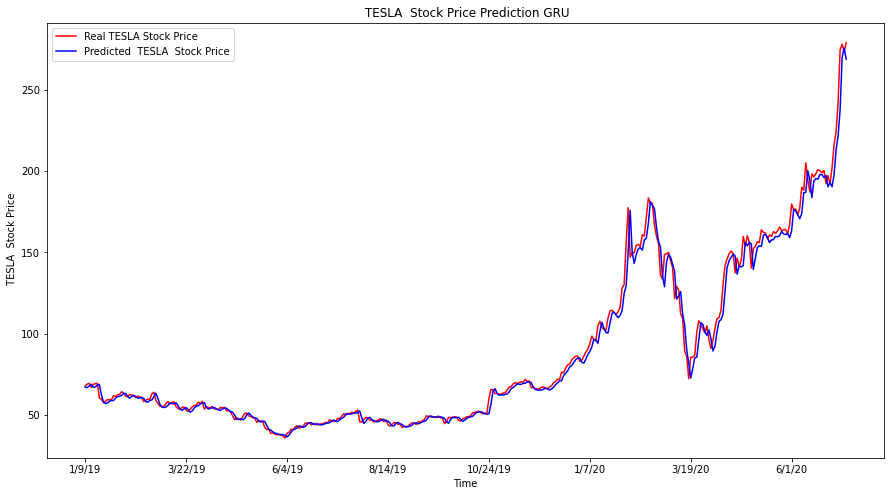

<Figure size 432x288 with 0 Axes>

In [ ]:

predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)
y =  dataset_test.values.reshape(378,) 
x = df.loc[881: , "Date"] 
# Visualising the results
plt.figure(figsize=(15,8))
plt.plot(x, y, c= "red", label = "Real TESLA Stock Price")
plt.plot(df.loc[881:, "Date"],predicted_stock_price, color = "blue", label = "Predicted  TESLA  Stock Price")
plt.xticks(np.arange(0,378,50))
plt.title(' TESLA  Stock Price Prediction GRU')
plt.xlabel('Time')
plt.ylabel(' TESLA  Stock Price')
plt.legend()
plt.show() 
plt.savefig(" TESLA  GRU")

In [ ]:
abse = mean_absolute_error(predicted_stock_price,y)
abse

3.2960612097542574

In [ ]:
rmse = math.sqrt(mean_squared_error(predicted_stock_price,y))
rmse

5.875076680896206

Bi-LSTM

In [ ]:
np.random.seed(1)
model = Sequential()
model.add(Bidirectional(LSTM(units = 700, input_shape = (X_train.shape[1], 1))))
model.add(Dropout(0.1))
model.add(Dense(units = 1))
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(X_train, y_train, epochs = 30, batch_size = 32)

Epoch 1/30
26/26 [==============================] - 4s 30ms/step - loss: 0.0933
Epoch 2/30
26/26 [==============================] - 1s 26ms/step - loss: 0.0110
Epoch 3/30
26/26 [==============================] - 1s 26ms/step - loss: 0.0054
Epoch 4/30
26/26 [==============================] - 1s 26ms/step - loss: 0.0043
Epoch 5/30
26/26 [==============================] - 1s 26ms/step - loss: 0.0046
Epoch 6/30
26/26 [==============================] - 1s 26ms/step - loss: 0.0040
Epoch 7/30
26/26 [==============================] - 1s 26ms/step - loss: 0.0032
Epoch 8/30
26/26 [==============================] - 1s 26ms/step - loss: 0.0030
Epoch 9/30
26/26 [==============================] - 1s 26ms/step - loss: 0.0028
Epoch 10/30
26/26 [==============================] - 1s 26ms/step - loss: 0.0031
Epoch 11/30
26/26 [==============================] - 1s 26ms/step - loss: 0.0025
Epoch 12/30
26/26 [==============================] - 1s 26ms/step - loss: 0.0029
Epoch 13/30
26/26 [==================

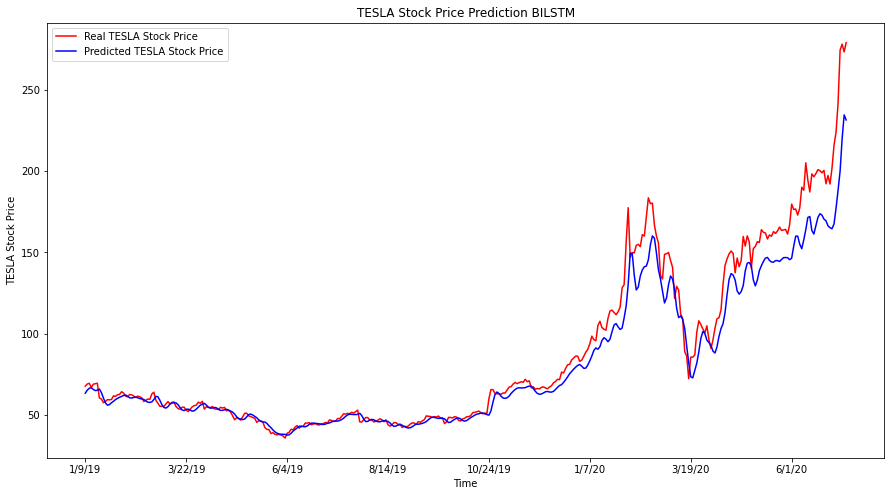

<Figure size 432x288 with 0 Axes>

In [ ]:

predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)
y =  dataset_test.values.reshape(378,) 
x = df.loc[881: , "Date"] 
# Visualising the results
plt.figure(figsize=(15,8))
plt.plot(x, y, c= "red", label = "Real TESLA Stock Price")
plt.plot(df.loc[881:, "Date"],predicted_stock_price, color = "blue", label = "Predicted TESLA Stock Price")
plt.xticks(np.arange(0,378,50))
plt.title('TESLA Stock Price Prediction BILSTM')
plt.xlabel('Time')
plt.ylabel('TESLA Stock Price')
plt.legend()
plt.show() 
plt.savefig("TESLA BILSTM")

In [ ]:
abse = mean_absolute_error(predicted_stock_price,y)
abse

7.9452864759431066

In [ ]:
rmse = math.sqrt(mean_squared_error(predicted_stock_price,y))
rmse

13.621667280861525

Bi-GRU

In [ ]:
model = Sequential()

model.add(Bidirectional(GRU(units = 700, input_shape = (X_train.shape[1], 1))))
model.add(Dropout(0.1))

# Adding the output layer
model.add(Dense(units = 1))


model.compile(optimizer = 'adam', loss = 'mean_squared_error')

model.fit(X_train, y_train, epochs = 30, batch_size = 32)

Epoch 1/30
26/26 [==============================] - 8s 225ms/step - loss: 0.0769
Epoch 2/30
26/26 [==============================] - 6s 224ms/step - loss: 0.0055
Epoch 3/30
26/26 [==============================] - 6s 223ms/step - loss: 0.0031
Epoch 4/30
26/26 [==============================] - 6s 221ms/step - loss: 0.0029
Epoch 5/30
26/26 [==============================] - 6s 222ms/step - loss: 0.0024
Epoch 6/30
26/26 [==============================] - 6s 222ms/step - loss: 0.0020
Epoch 7/30
26/26 [==============================] - 6s 224ms/step - loss: 0.0019
Epoch 8/30
26/26 [==============================] - 6s 224ms/step - loss: 0.0019
Epoch 9/30
26/26 [==============================] - 6s 223ms/step - loss: 0.0020
Epoch 10/30
26/26 [==============================] - 6s 225ms/step - loss: 0.0023
Epoch 11/30
26/26 [==============================] - 6s 220ms/step - loss: 0.0021
Epoch 12/30
26/26 [==============================] - 6s 226ms/step - loss: 0.0019
Epoch 13/30
26/26 [======

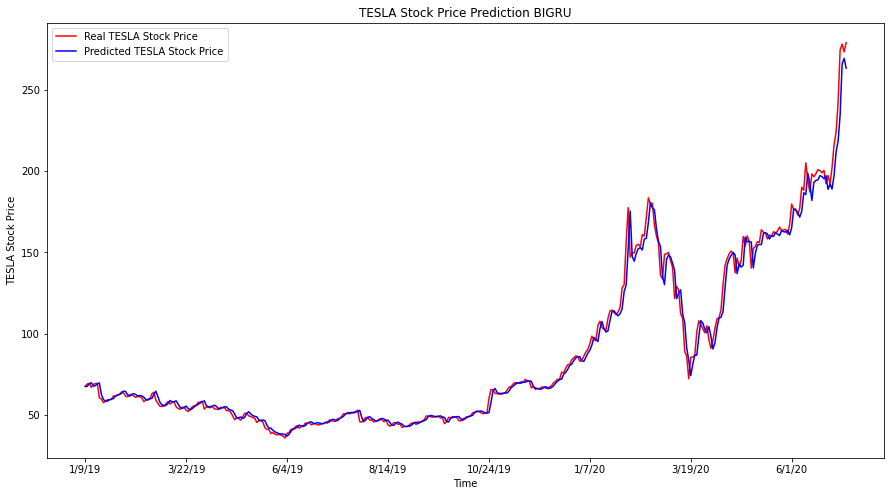

<Figure size 432x288 with 0 Axes>

In [ ]:

predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)
y =  dataset_test.values.reshape(378,) 
x = df.loc[881: , "Date"] 
# Visualising the results
plt.figure(figsize=(15,8))
plt.plot(x, y, c= "red", label = "Real TESLA Stock Price")
plt.plot(df.loc[881:, "Date"],predicted_stock_price, color = "blue", label = "Predicted TESLA Stock Price")
plt.xticks(np.arange(0,378,50))
plt.title('TESLA Stock Price Prediction BIGRU')
plt.xlabel('Time')
plt.ylabel('TESLA Stock Price')
plt.legend()
plt.show() 
plt.savefig("TESLA BIGRU")

In [ ]:
abse = mean_absolute_error(predicted_stock_price,y)
abse

3.159299017894604

In [ ]:
rmse = math.sqrt(mean_squared_error(predicted_stock_price,y))
rmse

5.868884850614187

Breaking Dataset to Improve Performance

In [ ]:
training_set = df.iloc[:, 4:5].values
# Feature Scaling
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)
# Creating a data structure with 60 time-steps and 1 output




In [ ]:
X_train = []
y_train = []
for i in range(60, 351):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])

for i in range(501, 852):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])

for i in range(1002, 1353):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0],  X_train.shape[1], 1))
X_train.shape

In [ ]:

inputs = df.iloc[:, 4:5].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
print(inputs.shape)




In [ ]:
X_test = []
y_test = []
for i in range(351, 501):
    X_test.append(inputs[i-60:i, 0])
    y_test.append(df.iloc[i, 4:5].values)

for i in range(852, 1002):
    X_test.append(inputs[i-60:i, 0])
    y_test.append(df.iloc[i, 4:5].values)

for i in range(1353, 1503):
    X_test.append(inputs[i-60:i, 0])
    y_test.append(df.iloc[i, 4:5].values)

X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(X_test.shape)
# (459, 60, 1)

In [ ]:
np.random.seed(1)

model = Sequential()

model.add(GRU(units = 700, input_shape = (X_train.shape[1], 1)))

model.add(Dropout(0.2))

model.add(Dense(units = 1))


model.compile(optimizer = 'adam', loss = 'mean_squared_error')


model.fit(X_train, y_train, epochs = 30, batch_size = 32)

In [ ]:

predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)


In [ ]:
abse = mean_absolute_error(predicted_stock_price, y_test)

In [ ]:
abse

In [ ]:
rmse = math.sqrt(mean_squared_error(predicted_stock_price,y_test))
rmse

In [ ]:
x1 = df.loc[351:500 , "Date"]
x2 = df.loc[852:1001 , "Date"]
x3 = df.loc[1353: , "Date"]

In [ ]:
x = pd.concat([x1,x2,x3], axis =0)

In [ ]:

# Visualising the results
plt.figure(figsize=(15,8))
plt.plot(x, y_test, c= "red", label = "Real APPLE Stock Price")
plt.plot(x,predicted_stock_price, color = "blue", label = "Predicted APPLE Stock Price")
plt.xticks(np.arange(0,451,50))
plt.title('APPLE Stock Price Prediction Split data  GRU')
plt.xlabel('Time')
plt.ylabel('APPLE Stock Price')
plt.legend()
plt.show() 
plt.savefig("APPLE Split data GRU")